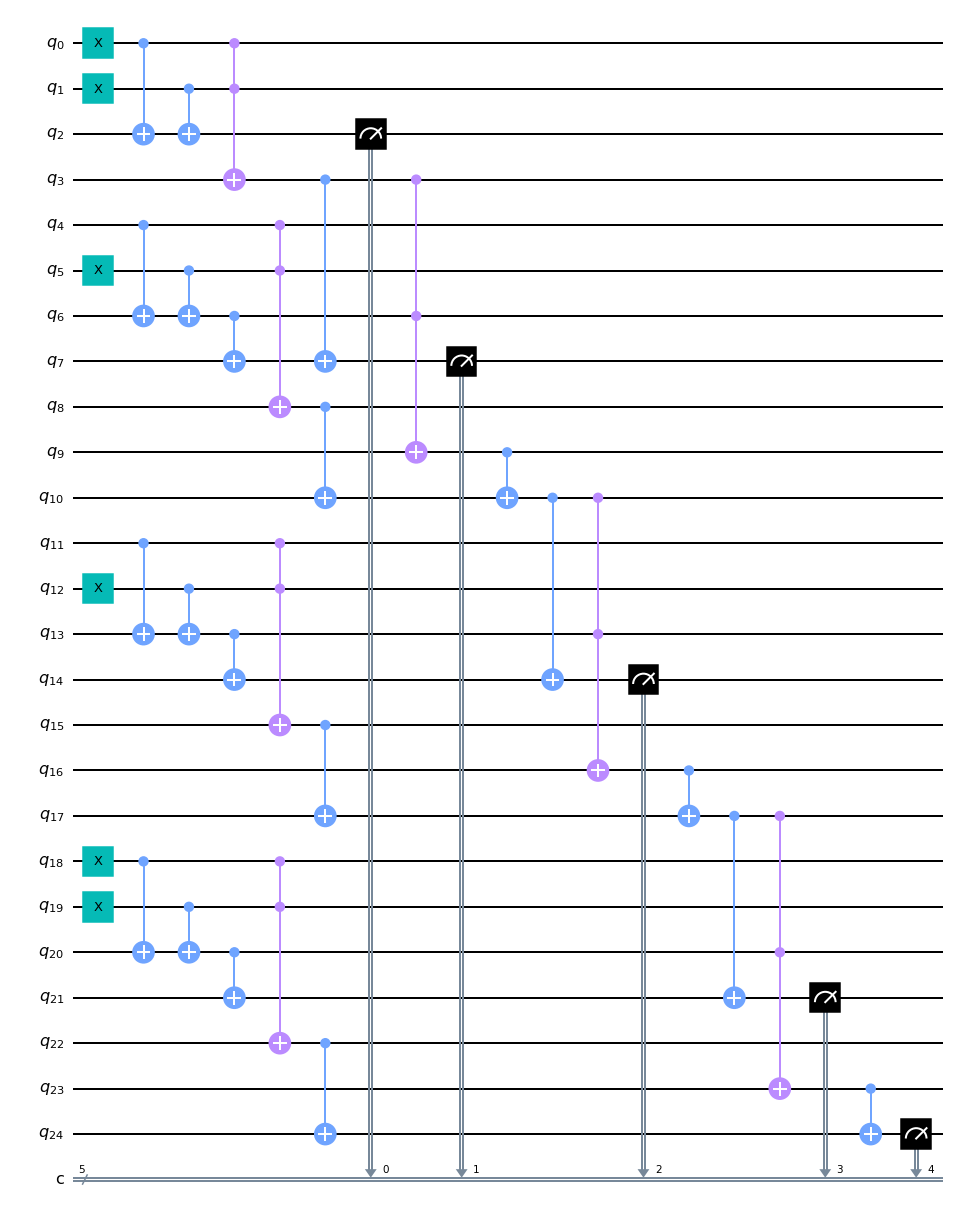

{'11000': 1024}

In [30]:


# Just by encoding numbers and making some changes in the given program we can add any two numbers of multiple bits.
# For example, here two 4-bit numbers are added using the given program.
# In this case Input(1)=1001 and Input(2)=1110.

# Create quantum circuit with 25 qubits and 5 classical bits
qc = QuantumCircuit(25,5)

# First, our circuit should encode the inputs that are to be added


# a(3) = 1 
# a(2) = 0     Input(1)
# a(1) = 0
# a(0) = 1

# b(3) = 1
# b(2) = 1      Input(2)
# b(1) = 1
# b(0) = 0


# Encoding the inputs

qc.x(18)
qc.x(0)
qc.x(19)
qc.x(12)
qc.x(5)
qc.x(1)


# After Encoding the inputs

# q(18) = a(3) = 1
# q(11) = a(2) = 0
# q(4)  = a(1) = 0
# q(0)  = a(0) = 1


# q(19) = b(3) = 1
# q(12) = b(2) = 1
# q(5)  = b(1) = 1
# q(1)  = b(0) = 0


# For obtaining XOR of the two inputs which will denote a(0)+b(0). 
qc.cx(0,2)
qc.cx(1,2)

# For obtaining AND of the two inputs which will denote the carry ontained.
qc.ccx(0,1,3)

numbers = [4,11,18]

for i in numbers:

    # XOR of q(i)and q(i+1).
    qc.cx(i,i+2)
    qc.cx(i+1,i+2)
    
    # XOR of q(i+2)and q(i-1).
    qc.cx(i+2,i+3)
    qc.cx(i-1,i+3)
    
    # AND of q(i) and q(i+1).
    qc.ccx(i,i+1,i+4)
    
    # AND of q(i+2) and q(i-1).
    qc.ccx(i+2,i-1,i+5)
  
    # XOR of q(i+2)and q(i-1).
    qc.cx(i+4,i+6)
    qc.cx(i+5,i+6)




#For measuring the qubits.

qc.measure(24,4) # measure qubit 24 to classical bit 4.
qc.measure(21,3) # measure qubit 21 to classical bit 3.
qc.measure(14,2) # measure qubit 14 to classical bit 2.
qc.measure(7,1)  # measure qubit  7 to classical bit 1.
qc.measure(2,0)  # measure qubit  2 to classical bit 0.


#For obtaining pictorialdescription of the notebook
display(qc.draw())


from qiskit.providers.aer import AerSimulator

# Make new simulator object
sim = AerSimulator() 

# Run the experiment
job = sim.run(qc)  

# Get the results
result = job.result()   
result.get_counts()
